# Analyze target statistics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Read target csv
subset_name = 'target_subset_' + Path('.').resolve().name
df = pd.read_csv(f'../../../../data/interim/{subset_name}.csv', index_col=0)
df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
1,5ZHE_A,2.180,2021-03-03T00:00:00Z,">5zhe_A mol:protein length:253 Ditrans,polyci...",MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...,253,52,2,True
2,5ZCT_A,2.050,2019-03-27T00:00:00Z,>5zct_A mol:protein length:306 Ribosomal prot...,MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...,306,11,9,True
3,6IYB_A,2.096,2020-08-05T00:00:00Z,>6iyb_A mol:protein length:199 Ras-related pr...,GSAMGSTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATI...,199,20,2,True
4,6PXX_B,1.500,2019-12-11T00:00:00Z,>6pxx_B mol:protein length:265 Beta-lactamase,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,265,447,130,True
...,...,...,...,...,...,...,...,...,...
295,6MGH_A,1.950,2019-05-01T00:00:00Z,>6mgh_A mol:protein length:163 miRFP670nano,MGSHHHHHHGRSAAGTMANLDKMLNTTVTEVRQFLQVDRVCVFQFE...,163,8,8,False
296,6K2F_A,1.550,2019-06-05T00:00:00Z,>6k2f_A mol:protein length:138 Actin binding ...,AIELSTDLINKFKDMNSSGNGRFIQATIVDETINIKAIEQGTSDFD...,138,2,2,False
297,6WJA_A,2.098,2021-03-03T00:00:00Z,>6wja_A mol:protein length:310 NAD-dependent ...,MSAERILVTGGAGFIGSHLVDALLAKGYAVRVLDDLSTGKVGNLPM...,310,6,6,False
298,7CUZ_A,2.420,2021-04-28T00:00:00Z,>7cuz_A mol:protein length:312 Acetylxylan es...,MTKINNWQDYQGSSLKPEDFDKFWDEKINLVSNHQFEFELIEKNLS...,312,4,4,False


In [3]:
df['is_similar_AF2'] = ['True' if x == True else 'False' for x in df['is_similar_AF2']]

In [4]:
# Number of sequences included in the AF2 training data in the cluster
df['num_sequence_in_cluster_included_AF2'] = df['num_entry_in_cluster'] - df['num_entry_in_cluster_AF2_notInclude']

## Show target distribution

<AxesSubplot:xlabel='length'>

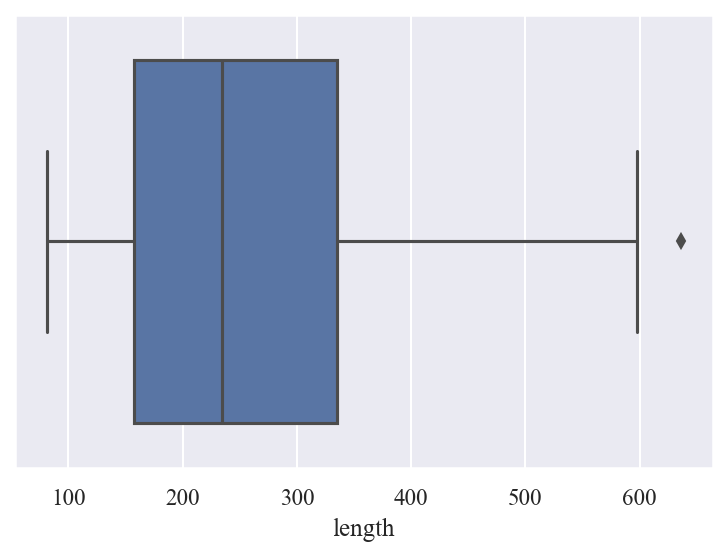

In [5]:
# Sequence length
sns.boxplot(data=df, x='length')

<AxesSubplot:xlabel='length', ylabel='is_similar_AF2'>

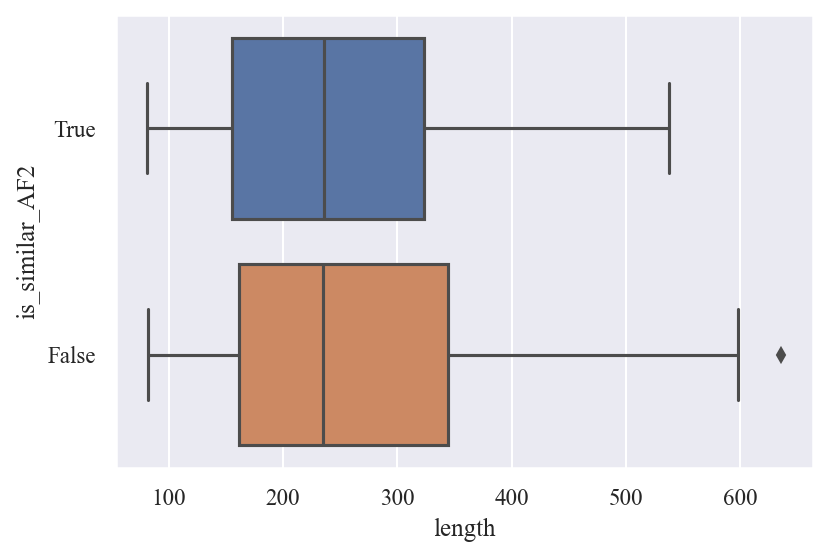

In [6]:
sns.boxplot(data=df, x='length', y='is_similar_AF2')

<AxesSubplot:xlabel='resolution'>

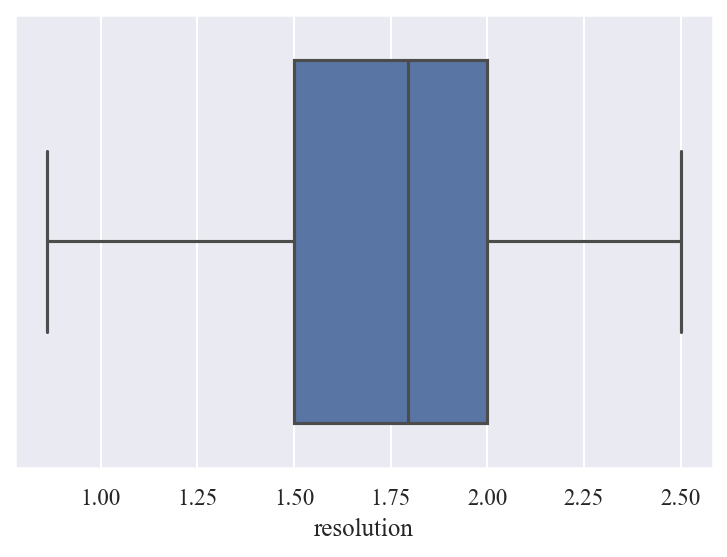

In [7]:
# Resolution
sns.boxplot(data=df, x='resolution')

<AxesSubplot:xlabel='resolution', ylabel='is_similar_AF2'>

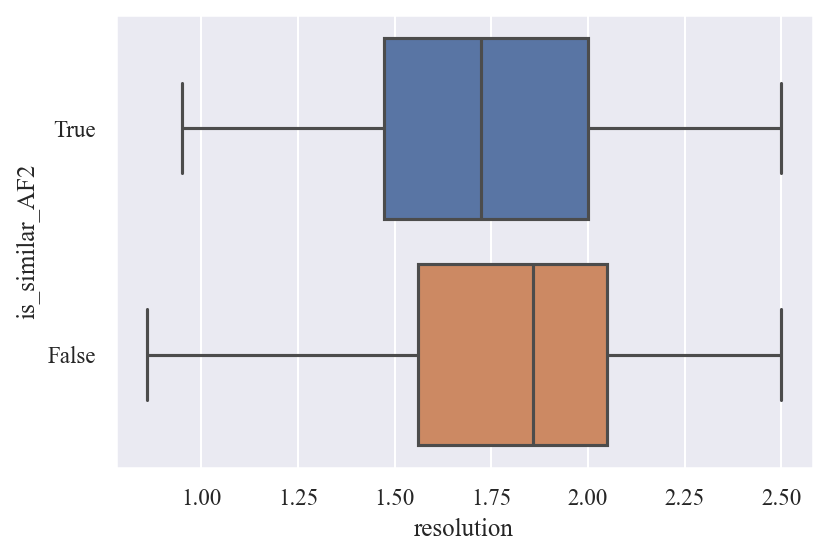

In [8]:
sns.boxplot(data=df, x='resolution', y='is_similar_AF2')

<AxesSubplot:xlabel='is_similar_AF2', ylabel='count'>

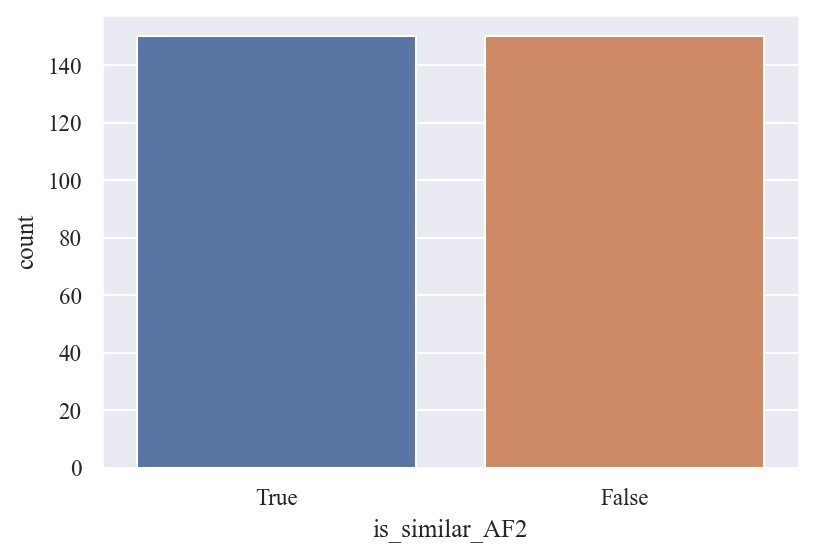

In [9]:
# Target number that have similar sequence to AF2 training dataset and not
sns.countplot(data=df, x='is_similar_AF2')

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_entry_in_cluster'>

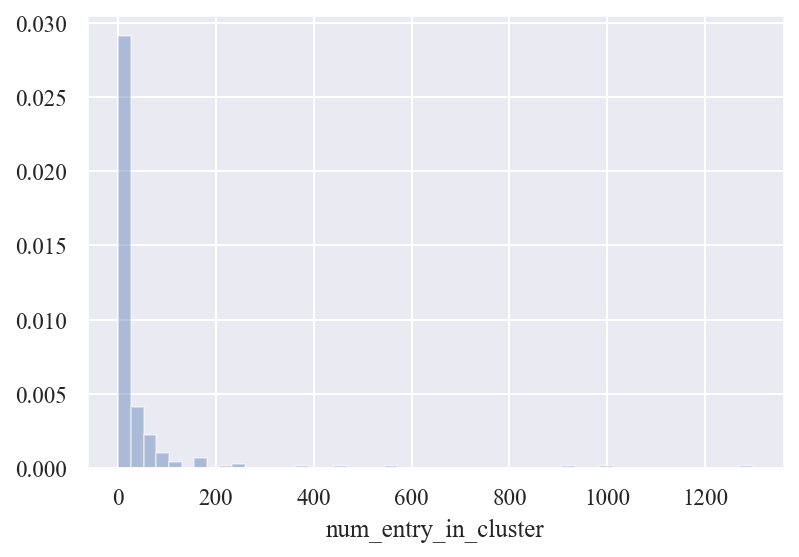

In [10]:
sns.distplot(df['num_entry_in_cluster'], kde=False, norm_hist=True)

<AxesSubplot:xlabel='num_sequence_in_cluster_included_AF2'>

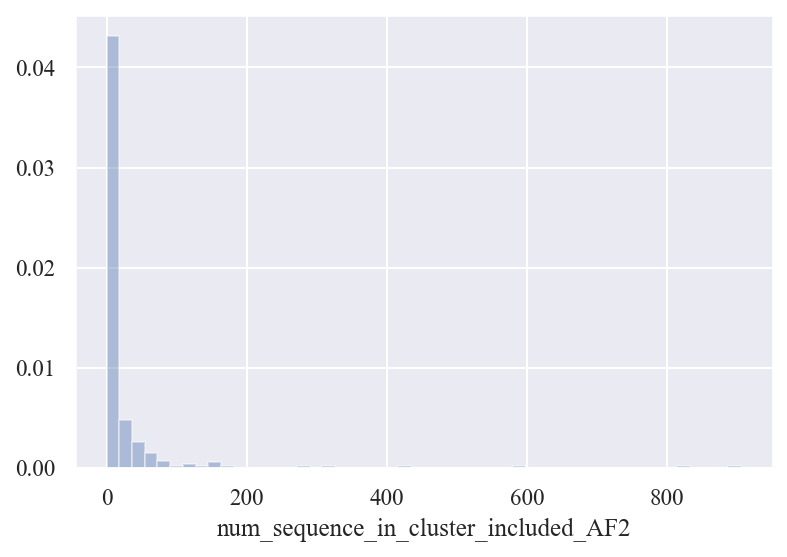

In [11]:
sns.distplot(df['num_sequence_in_cluster_included_AF2'], kde=False, norm_hist=True)